In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1000000000, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Domestic', 'Government', min_assets=800000000)
equities = screen_funds('Equities', 'Domestic', 'Large-Cap')
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 75, 21)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

22 80
from 2019-04-22 to 2019-07-05 - 102


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

44


,len,mean,std,shrp,drawdown
Symbols,,,,,
MBB,32,1.058892,0.249363,3.578024,0.325100
VMBS,32,0.942136,0.221027,3.508473,0.264901
IEF,32,2.381526,0.761367,2.909058,0.634695
TLH,32,3.245632,1.090961,2.822251,0.896451
GOVT,32,1.751330,0.576024,2.751036,0.502905
VGIT,32,1.702492,0.565031,2.718126,0.500067
SCHR,32,1.703328,0.573784,2.678116,0.490910
IEI,32,1.522626,0.513882,2.638660,0.413588
VGLT,32,4.217045,1.552850,2.608352,1.634910


evicted VMBS 0.9444911886506105
evicted IPE 0.9387853330891096
evicted VTIP 0.8145736120307266
evicted SPLV 0.9356547426054231
evicted SCHR 0.8932320419126092
evicted MBB 0.7392523162512239
retry backlogs ['TLT', 'MGV', 'STIP', 'IEI', 'IEF', 'SHY', 'IUSG', 'VGSH', 'TDTT', 'VGLT', 'VGIT', 'SCHO', 'TIP', 'SPYG', 'SCHP', 'EDV', 'GOVT', 'TLH', 'DGRO', 'NOBL', 'SPHQ', 'SPTS', 'IVW', 'VOOG', 'FVD', 'HDV', 'DIA', 'VIG', 'FTCS', 'USMV', 'PWV', 'JKE', 'ADX', 'MTUM', 'FPX', 'USA'] at 0.96
evicted TDTT 0.9259494191501169
evicted SPTS 0.9161701918374195
evicted TIP 0.7944998925893826
retry backlogs ['SCHP', 'VGIT', 'IEI', 'STIP', 'VGLT', 'SHY', 'IEF', 'VGSH', 'SCHO', 'MGV', 'IUSG', 'SPYG', 'TLT', 'EDV', 'NOBL', 'DGRO', 'IVW', 'SPHQ', 'FVD', 'HDV', 'DIA', 'GOVT', 'VOOG', 'VIG', 'FTCS', 'USMV', 'PWV', 'TLH', 'JKE', 'ADX', 'MTUM', 'FPX', 'USA'] at 0.97
evicted STIP 0.9308472305428247
evicted GOVT 0.9625975377643219
evicted SCHP 0.9012728110338263
evicted IEI 0.8499721279864416
evicted USA 0.963847465

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,32.0,3.602142,0.715605,2.376629,3.063280,3.669440,3.969806,5.059502,4.800798,1.026512
EDV,32.0,5.643993,2.282075,0.401792,4.435839,5.915584,6.912316,10.713052,2.400152,2.610604
FDL,32.0,0.845029,2.650096,-4.296100,-0.255264,0.778561,1.660236,6.939245,0.255977,5.266602


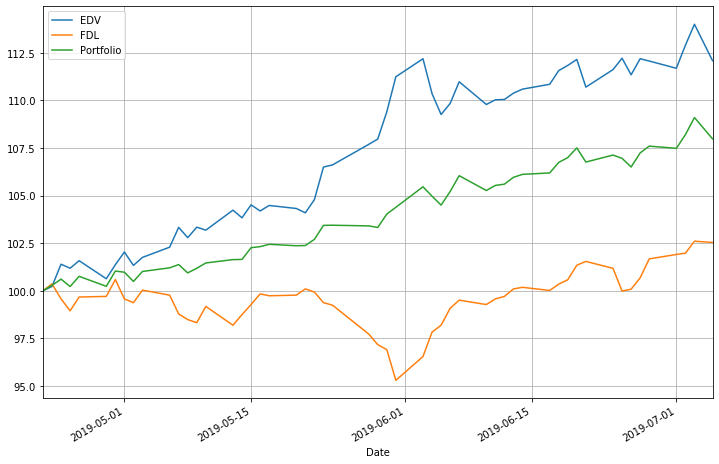

In [4]:
quote.setup_mask(stats.index)
ratio = quote.optimize_portfolio()
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)

{'SPXL': 0.22, 'TMF': 0.78}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,32.0,10.143641,3.174955,5.014756,7.559177,10.684435,11.907550,16.554032,3.142399,3.319430
TMF,32.0,12.518186,5.109940,1.334666,9.004761,12.790237,15.546584,23.599407,2.417155,5.014042
SPXL,32.0,2.071781,12.965681,-17.125983,-10.427928,2.278682,10.296719,26.700212,0.146935,19.502869


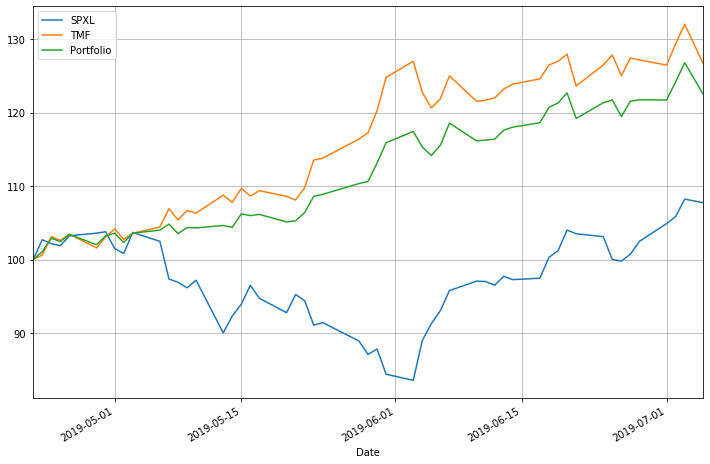

In [5]:
quote2 = Quote(['TMF', 'SPXL'], 75, 21)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)